[![deep-learning-notes](https://github.com/semilleroCV/deep-learning-notes/raw/main/assets/banner-notebook.png)](https://github.com/semilleroCV/deep-learning-notes)

In [29]:
#@title **Import required libraries**.
from sklearn.manifold import TSNE # 1.2.2
from sklearn.decomposition import PCA # 1.2.2
import matplotlib.pyplot as plt # 3.7.1
import numpy as np # 1.25.2

### <font color='#8203b1'>**Let's get the data from GloVe**</font>

**[GloVe](https://nlp.stanford.edu/projects/glove/)** is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [126]:
# Download the file using wget
!wget 'https://nlp.stanford.edu/data/glove.6B.zip' -O glove.6B.zip

--2024-06-26 18:04:31--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 18:04:31--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-06-26 18:07:11 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [22]:
# Unzip the file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


### <font color='#8203b1'>**Let's create our dictionary**</font>

In [25]:
def create_emb_dictionary(path:str):
  # Create the embeddings dictionary
  embeddings_dict = {}

  # Read the embeddings file and fill in the dictionary
  with open(path, 'r', encoding='utf-8') as f:
      for line in f:
        values = line.split()
        word = values[0]
        vector = list(map(float, values[1:]))
        embeddings_dict[word] = vector
  return embeddings_dict

In [37]:
# The size of the embeddings in this dataset can be 50, 100, 200 or 300.
EMB_DIM = 200 #@param
PATH = f'/content/glove.6B.{EMB_DIM}d.txt'
embeddings_dict = create_emb_dictionary(PATH)

In [35]:
# Show some embeddings to verify
def show_n_first_words(embeddings_dict:dict, n_words=5):
  for word in list(embeddings_dict)[:n_words]:
    print(f"{word}: {embeddings_dict[word]} size {len(embeddings_dict[word])}")

show_n_first_words(embeddings_dict)

the: [-0.071549, 0.093459, 0.023738, -0.090339, 0.056123, 0.32547, -0.39796, -0.092139, 0.061181, -0.1895, 0.13061, 0.14349, 0.011479, 0.38158, 0.5403, -0.14088, 0.24315, 0.23036, -0.55339, 0.048154, 0.45662, 3.2338, 0.020199, 0.049019, -0.014132, 0.076017, -0.11527, 0.2006, -0.077657, 0.24328, 0.16368, -0.34118, -0.06607, 0.10152, 0.038232, -0.17668, -0.88153, -0.33895, -0.035481, -0.55095, -0.016899, -0.43982, 0.039004, 0.40447, -0.2588, 0.64594, 0.26641, 0.28009, -0.024625, 0.63302, -0.317, 0.10271, 0.30886, 0.097792, -0.38227, 0.086552, 0.047075, 0.23511, -0.32127, -0.28538, 0.1667, -0.0049707, -0.62714, -0.24904, 0.29713, 0.14379, -0.12325, -0.058178, -0.001029, -0.082126, 0.36935, -0.00058442, 0.34286, 0.28426, -0.068599, 0.65747, -0.029087, 0.16184, 0.073672, -0.30343, 0.095733, -0.5286, -0.22898, 0.064079, 0.015218, 0.34921, -0.4396, -0.43983, 0.77515, -0.87767, -0.087504, 0.39598, 0.62362, -0.26211, -0.30539, -0.022964, 0.30567, 0.06766, 0.15383, -0.11211, -0.09154, 0.082562, 

### <font color='#8203b1'>**Low dimensionality plot of embeddings**</font>

In [74]:
def plot_embeddings(words2show:list, embeddings_dict:dict=embeddings_dict, fun=PCA):
  embeddings = np.array([embeddings_dict[word] for word in words2show])
  vectors_2d = fun(n_components=2, random_state=2024).fit_transform(embeddings)

  plt.figure(figsize=(20, 10))
  plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='red', edgecolors='r')
  for i, word in enumerate(words2show):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
  plt.title(f'Plot using {fun.__name__}')
  plt.show()

In [75]:
words = ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
         'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
         'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
         "apple", "banana", 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
         'school', 'work', 'university', 'highschool']

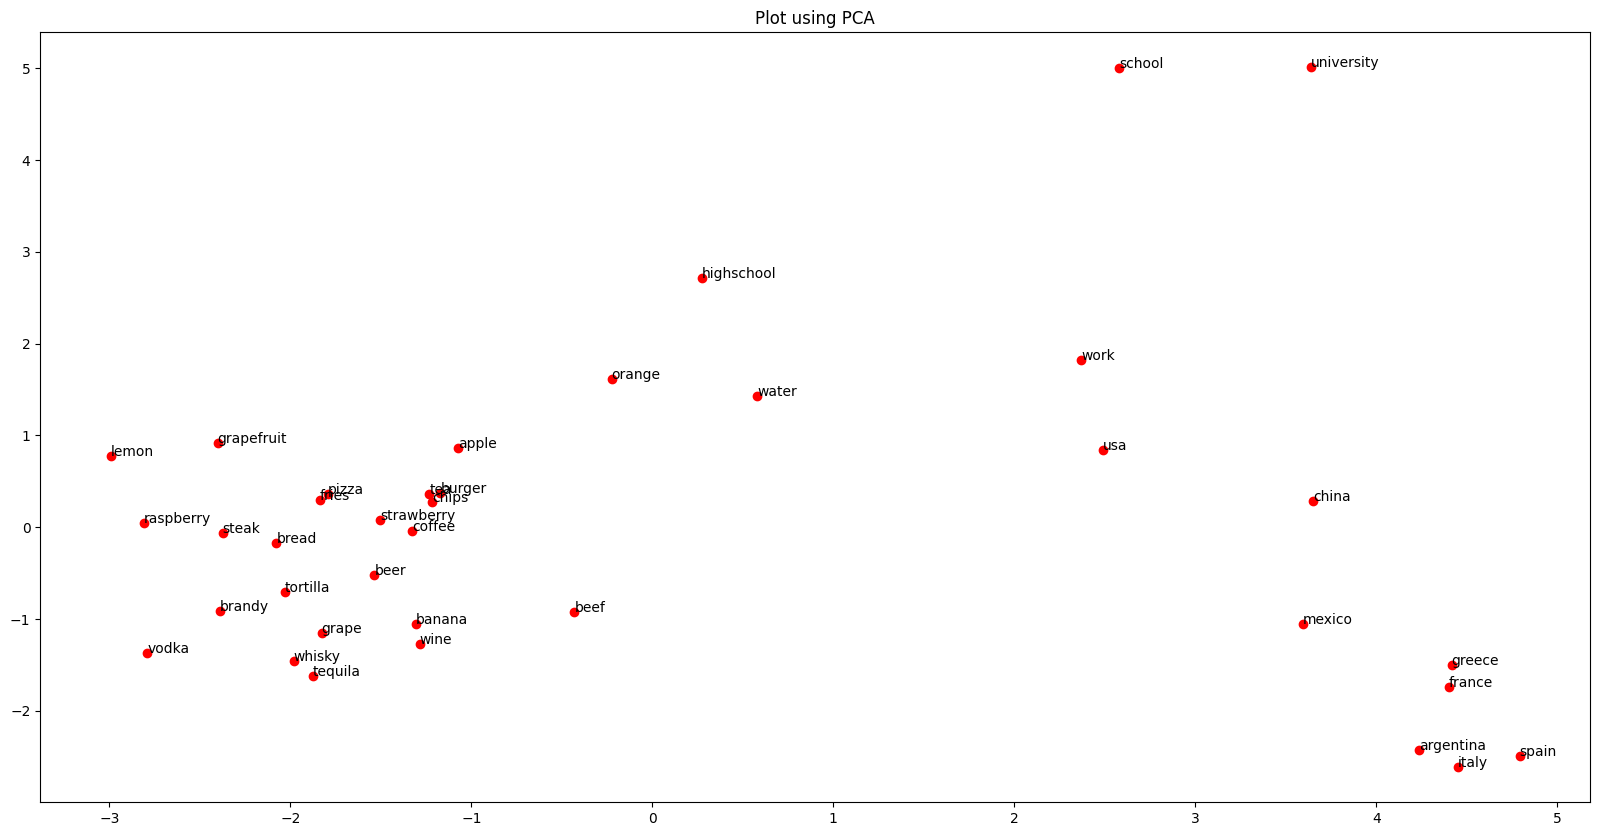

In [76]:
plot_embeddings(words)

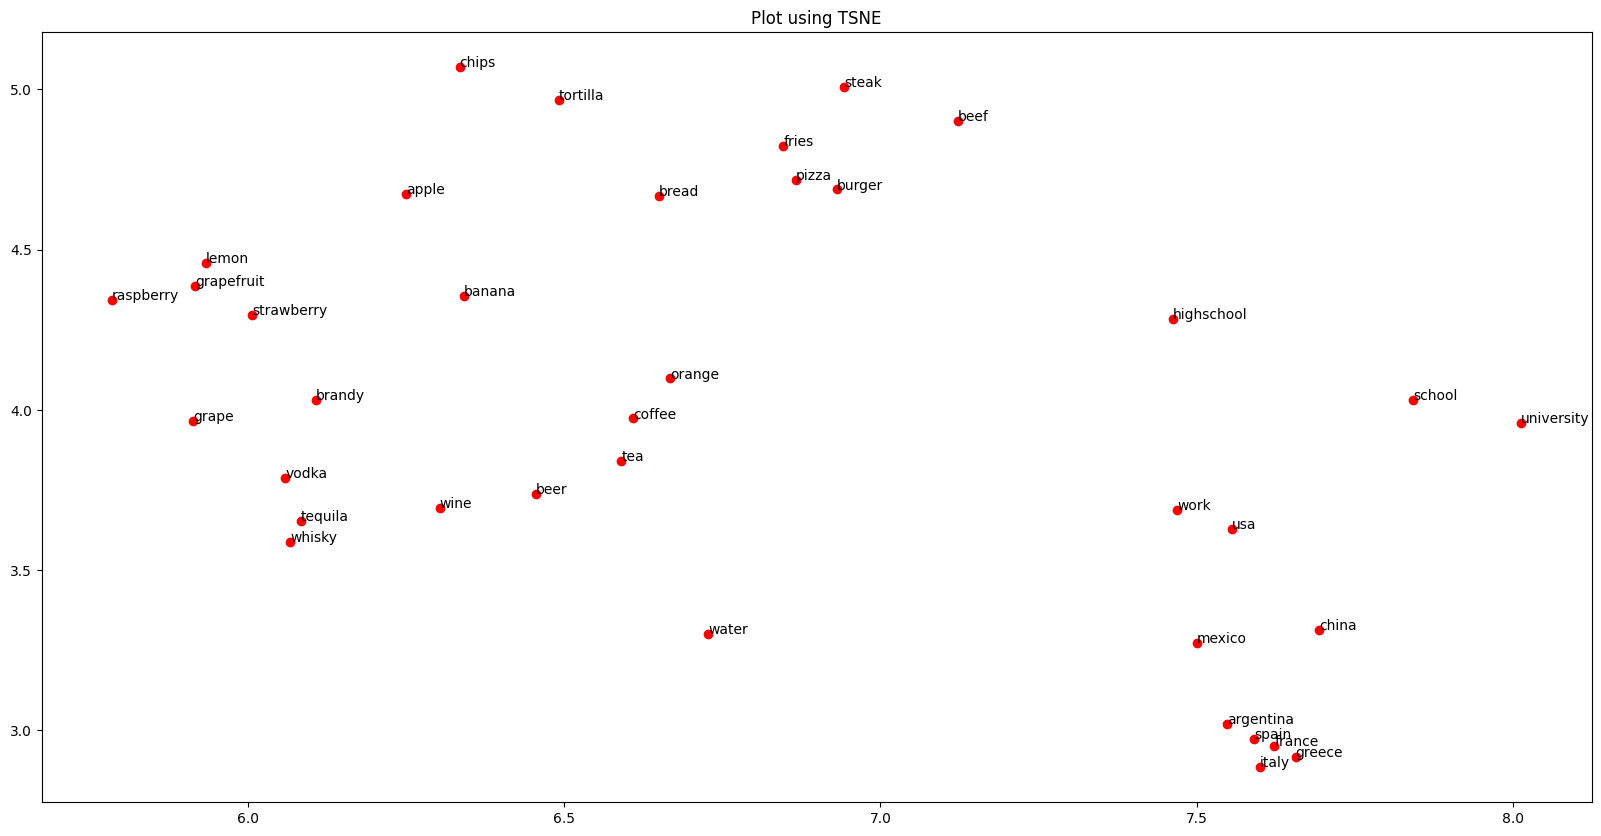

In [77]:
plot_embeddings(words, fun=TSNE)

### <font color='#8203b1'>**Let's make analogies**</font>

In [98]:
def analogy(word1:str, word2:str, word3:str, embeddings_dict:dict=embeddings_dict):
  embedding_w1 = np.array(embeddings_dict[word1])
  embedding_w2 = np.array(embeddings_dict[word2])
  embedding_w3 = np.array(embeddings_dict[word3])

  new_embedding = (embedding_w2 - embedding_w1) + embedding_w3

  max_cosine_sim = -float('inf')
  most_close = ''

  for word in list(embeddings_dict):
    if word not in [word1, word2, word3]:

      # We find the cosine similarity
      cosine_sim = np.dot(new_embedding, embeddings_dict[word]) / (np.linalg.norm(new_embedding) * np.linalg.norm(embeddings_dict[word]))
      if cosine_sim > max_cosine_sim:
        max_cosine_sim = cosine_sim
        most_close = word

  return f'{word1} is to {word2} as {word3} is to ** {most_close} **'

In [99]:
analogy('mexico', 'mexican', 'spain')

'mexico is to mexican as spain is to ** spanish **'

In [100]:
analogy('man', 'king', 'woman')

'man is to king as woman is to ** queen **'

### <font color='#8203b1'>**Let's find the closest words to an embedding**</font>

In [118]:
def find_most_similar(word:str, embeddings_dict:dict=embeddings_dict, top_n:int=10):
  if word not in embeddings_dict:
    raise ValueError(f"The word '{word}' is not in the embeddings dictionary.")

  embedding_word = np.array(embeddings_dict[word])

  similarities = {}

  for word_dict in list(embeddings_dict):
    if word_dict != word:
      cosine_sim = np.dot(embedding_word, embeddings_dict[word_dict]) / (np.linalg.norm(embedding_word) * np.linalg.norm(embeddings_dict[word_dict]))
      similarities[word_dict] = cosine_sim

  return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

In [119]:
find_most_similar('mexico')

[('mexican', 0.746624160389135),
 ('venezuela', 0.6772869210167971),
 ('colombia', 0.6657630617516543),
 ('peru', 0.6651744341297781),
 ('guatemala', 0.6427802316050415),
 ('argentina', 0.6350952954657274),
 ('brazil', 0.6251765793693822),
 ('chile', 0.6206824530420346),
 ('bolivia', 0.6196904971378979),
 ('america', 0.6157773372240224)]